# This is a sample notebook

Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Nisl nunc mi ipsum faucibus vitae aliquet nec. Ut sem nulla pharetra diam sit amet. Phasellus vestibulum lorem sed risus ultricies tristique nulla aliquet.

In [1]:
import matplotlib.pyplot as plt

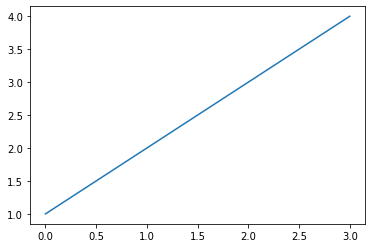

In [2]:
f, ax = plt.subplots()

ax.plot([1, 2, 3, 4]);

This Jupyter notebook/Pelican blog post demonstrates what you can do when you combine [Pelican](https://blog.getpelican.com) and [NBConvert](https://nbconvert.readthedocs.io/en/latest/) with a  simple Pelican Plugin, [pelican-jupyter-reader](https://github.com/chuckpr/pelican-jupyter-reader).

The `pelicanconf.py` for this demo includes a configuration object that is passed to NBConvert. Here are the relevant bits in `pelicanconf.py`:

In [3]:
!tail -n20 ../pelicanconf.py

# Instantiate a config object and call it NBCONVERT_CONFIG
from traitlets.config import Config
NBCONVERT_CONFIG = Config()

# This removes Jupyter input prompts
NBCONVERT_CONFIG.HTMLExporter.exclude_input_prompt = True

# This removes empty cells
NBCONVERT_CONFIG.RegexRemovePreprocessor.enabled = True
NBCONVERT_CONFIG.RegexRemovePreprocessor.patterns = ['\s*\Z']

# This makes Jupyter magic cells have proper code highlighting
# regardless of the language of the notebook kernel
NBCONVERT_CONFIG.HighlightMagicsPreprocessor.enabled = True

# This directs the NBConvert to a custom Jinja2 template
# names demo.tpl
NBCONVERT_CONFIG.HTMLExporter.template_path.append('.')
NBCONVERT_CONFIG.HTMLExporter.template_file = 'demo'



And, here is the custom NBConvert template (you can also just use one of the standard templates like `basic`, or `full`. 

In [4]:
!cat ../demo.tpl

{% extends "basic.tpl" %}

{% block codecell %}
  {% if "red-border" in cell.metadata.get('tags', []) %}
  <div style="border:thin solid red">
    {{ super() }}
  </div>
  {% elif "display-none" in cell.metadata.get('tags', []) %}
  <div style="display:none">
    {{ super() }}
  </div>
  {% else %}
  {{ super() }}
  {% endif %}
{% endblock codecell %}

{% block input_group %}
  {% if "toggle-code" in cell.metadata.get('tags', []) %}
  <button class="toggle-button">Toggle Code</button>
  <div style="display: none">
    {{ super() }}
  </div>
  {% else %}
  {{ super() }}
  {% endif %}
{% endblock %}

The combination of custom NBConvert template and the `pelicanconf.py` settings from above enable the code styles and interactity below.

In [5]:
%%javascript
// note that Pygments uses the Javascript lexer here
console.log('Hello, world!')
const s = 'something'

<IPython.core.display.Javascript object>

In [6]:
%%bash
# ...and the Bash lexer here
echo "Hello, world!"

Hello, world!


In [7]:
# By combining cell tags and a custom nbconvert template, we can style the output 
# of different cells easily. This cell has the tag "red-border," and that tag is 
# handled in "demo.tbl" (you can find "demo.tpl" in the base directory of this 
# demo site).

print('This cell will have a red border.')

This cell will have a red border.


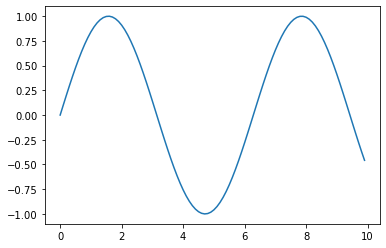

In [8]:
# We can add a toggle button for this code by using a custom Jinja2 template
# that looks for the "toggle-code" tag.

import numpy as np

X = np.arange(0, 10, 0.1)
Y = np.sin(X)

f, ax = plt.subplots()

ax.plot(X, Y);

In [9]:
from IPython.display import HTML, IFrame
# this cell wil be hidden in the output because it has the "display-none" tag
HTML('''
<script src="https://ajax.googleapis.com/ajax/libs/jquery/3.4.1/jquery.min.js">
</script>
''')

In [10]:
%%javascript
// This cell wil be hidden in the output because it has the "display-none" tag.
// This script will become part of the rendered page in our site. 
$( ".toggle-button" ).click(function() {
  $(this).next("div").slideToggle( "fast" );
});

<IPython.core.display.Javascript object>

The empty cells below won't apper in your Pelican post.